# Genero

In [1]:
import gc

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df2020 = pd.read_csv('../kaggle_survey_2020_responses.csv',
                               low_memory=False)
df2018 = pd.read_csv('../multipleChoiceResponses.csv',
                               low_memory=False)

In [3]:
#para 2020
columnasAgeGenderCountry = ['Q1','Q2','Q3']

In [4]:
dfGenero2020 = df2020[columnasAgeGenderCountry]
dfGenero2018 = df2018[columnasAgeGenderCountry]


In [5]:
dfGenero2020["Year"]=2020
dfGenero2018["Year"]=2018

In [6]:
dfGenero2020.shape[0]

20037

In [7]:
dfGenero2020.drop([0],inplace=True)
dfGenero2020.reset_index(drop=True,inplace=True)
dfGenero2018.drop([0],inplace=True)
dfGenero2018.reset_index(drop=True,inplace=True)

In [8]:
dict1 = {'Q1': 'P2',
        'Q2': 'P1'}
  
dfGenero2018.rename(columns=dict1,inplace=True)
dfGenero2018_new = dfGenero2018
#dfGenero2018_new.head()

In [9]:
dict2 = {'P1': 'Q1',
        'P2': 'Q2'}
dfGenero2018.rename(columns=dict2,inplace=True)
dfGenero2018_new = dfGenero2018
#dfGenero2018_new.head()

In [10]:
dfGenero2018_new["Q2"].replace({"Female": "Woman", "Male": "Man"}, inplace=True)

In [11]:
df2018y2020 = pd.concat([dfGenero2020, dfGenero2018_new], ignore_index=True)
df2018y2020.sort_values(by=['Year'], ascending=False)
#df2018y2020.head(-10)

,Q1,Q2,Q3,Year
0,35-39,Man,Colombia,2020
13356,25-29,Man,Brazil,2020
13363,18-21,Man,India,2020
13362,50-54,Man,Morocco,2020
13361,40-44,Man,Taiwan,2020
...,...,...,...,...
27985,35-39,Man,India,2018
27984,25-29,Man,India,2018
27983,25-29,Man,China,2018
27982,22-24,Man,China,2018


<AxesSubplot:xlabel='count', ylabel='Q2'>

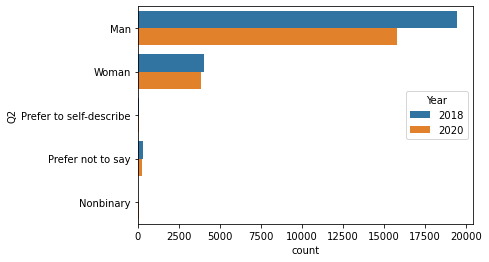

In [12]:
sns.countplot(data = df2018y2020,y = "Q2",hue="Year",hue_order=[2018, 2020])

# Gender (mean)

In [13]:
cxx= df2018y2020.groupby(['Q2','Year'], as_index=True).agg({'Year': ['count']})
cxx=cxx.reset_index()

In [14]:
#cxx

In [15]:
data={'Gender':cxx.iloc[:,0],'Year':cxx.iloc[:,1],'Count':cxx.iloc[:,2]}


In [16]:
dfresumen=pd.DataFrame(data)
dfresumen['mean']=''


In [17]:

#dfresumen.iloc[1][1]
#type(dfresumen['Year'][0])
#len(dfresumen)
#len(df2018)

In [18]:
for f in range(len(dfresumen)):
    
    if dfresumen['Year'][f]==2018:
        dfresumen['mean'][f]=dfresumen['Count'][f]/len(dfGenero2018)*100
    else:
        dfresumen['mean'][f]=dfresumen['Count'][f]/len(dfGenero2020)*100
dfresumen


,Gender,Year,Count,mean
0,Man,2018,19430,81.436774
1,Man,2020,15789,78.803154
2,Nonbinary,2020,52,0.259533
3,Prefer not to say,2018,340,1.425039
4,Prefer not to say,2020,263,1.312637
5,Prefer to self-describe,2018,79,0.331112
6,Prefer to self-describe,2020,54,0.269515
7,Woman,2018,4010,16.807075
8,Woman,2020,3878,19.355161


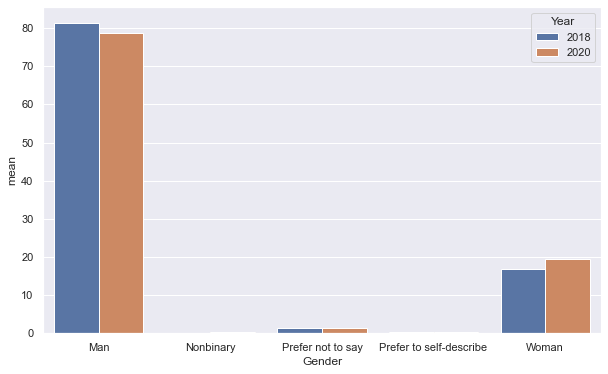

In [19]:
sns.set(rc={'figure.figsize': (10,6)})
ax = sns.barplot(x="Gender", y="mean", hue="Year", data=dfresumen)



# Edades

In [20]:
df2018y2020.sort_values("Q1",inplace=True)
df2018y2020.reset_index(drop=True,inplace=True)
df2018y2020


,Q1,Q2,Q3,Year
0,18-21,Man,Indonesia,2020
1,18-21,Man,Indonesia,2020
2,18-21,Man,India,2018
3,18-21,Man,Egypt,2020
4,18-21,Man,United States of America,2020
...,...,...,...,...
43890,80+,Prefer not to say,I do not wish to disclose my location,2018
43891,80+,Prefer not to say,I do not wish to disclose my location,2018
43892,80+,Prefer not to say,Other,2018
43893,80+,Prefer to self-describe,Other,2018


<AxesSubplot:xlabel='Q1', ylabel='count'>

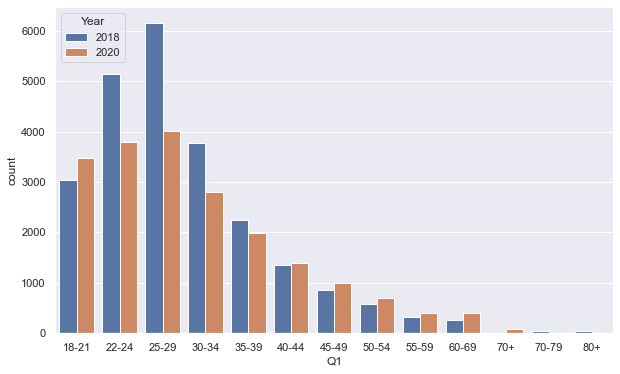

In [21]:
 sns.set(rc={'figure.figsize': (10,6)})
sns.countplot(data = df2018y2020,x = "Q1",hue="Year",hue_order=[2018, 2020])

# Edad (mean)


In [22]:
c= df2018y2020.groupby(['Q1','Year'], as_index=True).agg({'Year': ['count']})
c=c.reset_index()


In [23]:
data={'Age':c.iloc[:,0],'Year':c.iloc[:,1],'Count':c.iloc[:,2]}

In [24]:
dfresumen=pd.DataFrame(data)
dfresumen['mean']=''

In [25]:
for f in range(len(dfresumen)):
    
    if dfresumen['Year'][f]==2018:
        dfresumen['mean'][f]=dfresumen['Count'][f]/len(dfGenero2018)*100
    else:
        dfresumen['mean'][f]=dfresumen['Count'][f]/len(dfGenero2020)*100


Text(0.5, 1.0, 'Edad promedio')

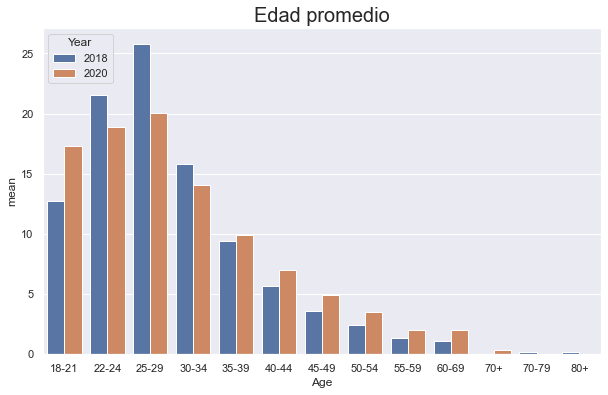

In [26]:
sns.set(rc={'figure.figsize': (10,6)})
ax = sns.barplot(x="Age", y="mean", hue="Year", data=dfresumen)
ax.set_title('Edad promedio',fontsize=20)

# Online plataforms

In [27]:
dfOnline2018 = df2018[['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6',
                                   'Q36_Part_7','Q36_Part_8','Q36_Part_9','Q36_Part_10','Q36_Part_11','Q36_Part_12',
                                   'Q36_Part_13']]


In [28]:
dfOnline2020 = df2020[['Q37_Part_1','Q37_Part_2','Q37_Part_3','Q37_Part_4','Q37_Part_5','Q37_Part_6',
                                   'Q37_Part_7','Q37_Part_8','Q37_Part_9','Q37_Part_10','Q37_Part_11','Q37_OTHER']]


In [29]:
dfOnline2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q37_Part_1   7383 non-null   object
 1   Q37_Part_2   2499 non-null   object
 2   Q37_Part_3   4844 non-null   object
 3   Q37_Part_4   3033 non-null   object
 4   Q37_Part_5   1059 non-null   object
 5   Q37_Part_6   2057 non-null   object
 6   Q37_Part_7   4627 non-null   object
 7   Q37_Part_8   1618 non-null   object
 8   Q37_Part_9   1077 non-null   object
 9   Q37_Part_10  3569 non-null   object
 10  Q37_Part_11  1307 non-null   object
 11  Q37_OTHER    1637 non-null   object
dtypes: object(12)
memory usage: 1.8+ MB


In [30]:
dfOnline2018.drop([0],inplace=True)
dfOnline2018.reset_index(drop=True,inplace=True)
dfOnline2020.drop([0],inplace=True)
dfOnline2020.reset_index(drop=True,inplace=True)

In [31]:
dfOnline2018.head()

,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN
3,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Udacity,Coursera,edX,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
dfOnline2018=dfOnline2018.melt()
dfOnline2018.drop(columns=['variable'],inplace=True)
dfOnline2018.dropna(inplace=True)
dfOnline2018.rename(columns={'value':'Online_Source'},inplace=True)
dfOnline2018["Year"]=2018
dfOnline2018.head()

,Online_Source,Year
4,Udacity,2018
7,Udacity,2018
9,Udacity,2018
11,Udacity,2018
15,Udacity,2018


In [33]:
dfOnline2020=dfOnline2020.melt()
dfOnline2020.drop(columns=['variable'],inplace=True)
dfOnline2020.dropna(inplace=True)
dfOnline2020.rename(columns={'value':'Online_Source'},inplace=True)
dfOnline2020["Year"]=2020
dfOnline2020.head()

,Online_Source,Year
0,Coursera,2020
1,Coursera,2020
2,Coursera,2020
3,Coursera,2020
6,Coursera,2020


In [34]:
dfOnline2018y2020 = pd.concat([dfOnline2020, dfOnline2018], ignore_index=True)
#dfOnline2018y2020.head()

<AxesSubplot:xlabel='count', ylabel='Online_Source'>

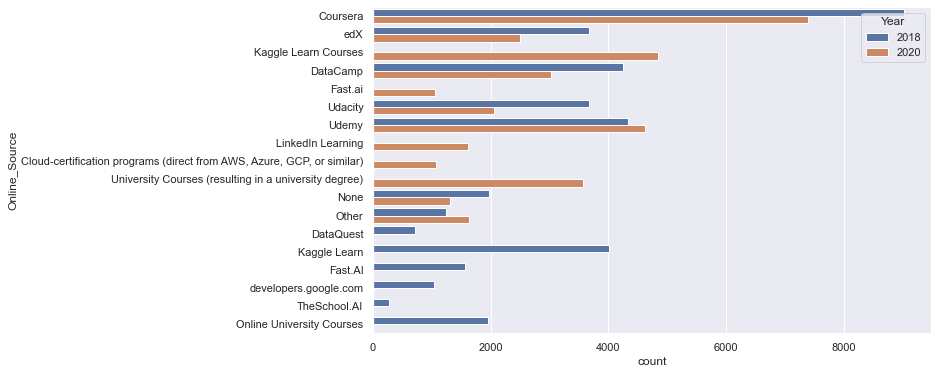

In [35]:
sns.set(rc={'figure.figsize': (10,6)})
sns.countplot(data = dfOnline2018y2020,y = "Online_Source",hue="Year",hue_order=[2018, 2020])

# OnLine Plataforms (mean)

Text(0.5, 1.0, 'Online Plataforms promedio')

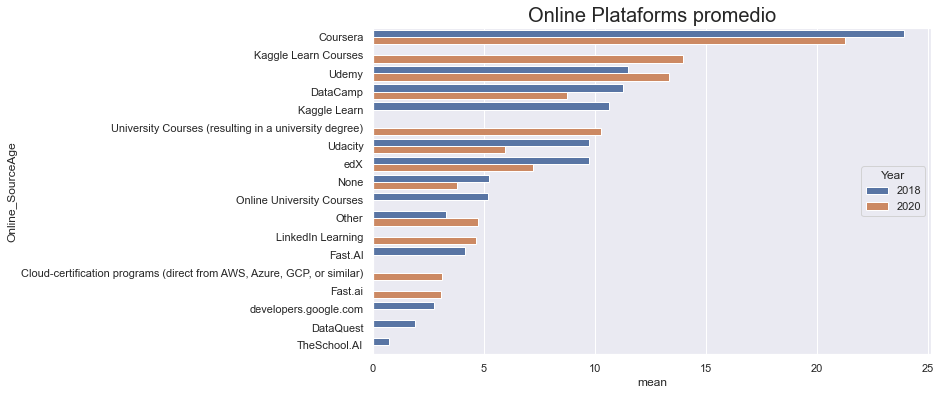

In [36]:
c= dfOnline2018y2020.groupby(['Online_Source','Year'], as_index=True).agg({'Year': ['count']})
c=c.reset_index()

data={'Online_SourceAge':c.iloc[:,0],'Year':c.iloc[:,1],'Count':c.iloc[:,2]}

dfresumen=pd.DataFrame(data)
dfresumen['mean']=''

for f in range(len(dfresumen)):
    if dfresumen['Year'][f]==2018:
        dfresumen['mean'][f]=dfresumen['Count'][f]/len(dfOnline2018)*100
    else:
        dfresumen['mean'][f]=dfresumen['Count'][f]/len(dfOnline2020)*100

dfresumen.sort_values("mean",ascending=False,inplace=True)
dfresumen.reset_index(drop=True,inplace=True)
dfresumen

        
sns.set(rc={'figure.figsize': (10,6)})
ax = sns.barplot(y="Online_SourceAge", x="mean", hue="Year", data=dfresumen)
ax.set_title('Online Plataforms promedio',fontsize=20)

# First language

In [37]:
dfFirstL2018=pd.DataFrame(df2018.Q18)
dfFirstL2020=pd.DataFrame(df2020.Q8)


In [38]:
dfFirstL2018

,Q18
0,What programming language would you recommend ...
1,Python
2,Python
3,Python
4,SQL
...,...
23855,Python
23856,NaN
23857,NaN
23858,NaN


In [39]:
dfFirstL2018.drop([0],inplace=True)
dfFirstL2018.dropna(inplace=True)
dfFirstL2018.reset_index(drop=True,inplace=True)
dfFirstL2020.drop([0],inplace=True)
dfFirstL2020.dropna(inplace=True)
dfFirstL2020.reset_index(drop=True,inplace=True)


In [40]:
dfFirstL2018.rename(columns={"Q18":"First"},inplace=True)
dfFirstL2020.rename(columns={"Q8":"First"},inplace=True)
dfFirstL2018["Year"]=2018
dfFirstL2020["Year"]=2020

In [41]:
dfFirstL2018y2020 = pd.concat([dfFirstL2018, dfFirstL2020], ignore_index=True)

<AxesSubplot:xlabel='count', ylabel='First'>

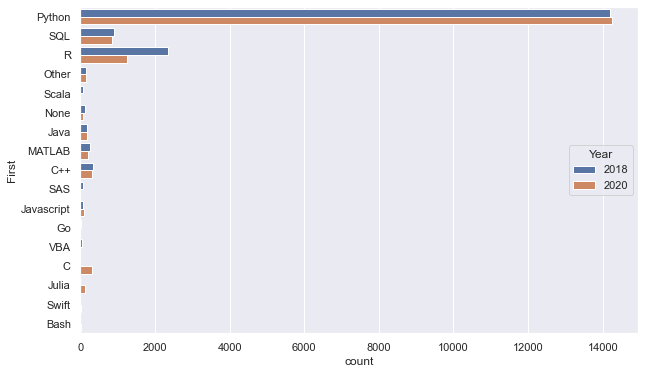

In [42]:
sns.set(rc={'figure.figsize': (10,6)})
sns.countplot(data = dfFirstL2018y2020,y = "First",hue="Year",hue_order=[2018, 2020])

# First Language Promedio

Text(0.5, 1.0, 'First Language promedio')

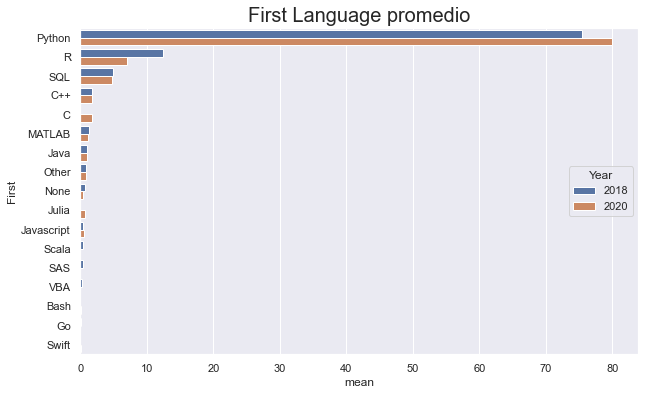

In [43]:
c= dfFirstL2018y2020.groupby(['First','Year'], as_index=True).agg({'Year': ['count']})
c=c.reset_index()

data={'First':c.iloc[:,0],'Year':c.iloc[:,1],'Count':c.iloc[:,2]}

dfresumen=pd.DataFrame(data)
dfresumen['mean']=''

for f in range(len(dfresumen)):
    if dfresumen['Year'][f]==2018:
        dfresumen['mean'][f]=dfresumen['Count'][f]/len(dfFirstL2018)*100
    else:
        dfresumen['mean'][f]=dfresumen['Count'][f]/len(dfFirstL2020)*100

dfresumen.sort_values("mean",ascending=False,inplace=True)
dfresumen.reset_index(drop=True,inplace=True)
dfresumen

        
sns.set(rc={'figure.figsize': (10,6)})
ax = sns.barplot(y="First", x="mean", hue="Year", data=dfresumen)
ax.set_title('First Language promedio',fontsize=20)

# IDE

In [44]:
dfIDE2018 = df2018[['Q13_Part_1', 'Q13_Part_2','Q13_Part_3', 'Q13_Part_4','Q13_Part_5', 'Q13_Part_6',
                          'Q13_Part_7','Q13_Part_8','Q13_Part_9','Q13_Part_10','Q13_Part_11','Q13_Part_12',
                          'Q13_Part_13','Q13_Part_14','Q13_Part_15']]
dfIDE2018.head()

,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15
0,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...
1,Jupyter/IPython,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jupyter/IPython,RStudio,PyCharm,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,Vim,NaN,NaN,NaN,NaN


In [45]:
dfIDE2020 = df2020[['Q9_Part_1', 'Q9_Part_2','Q9_Part_3', 'Q9_Part_4','Q9_Part_5', 'Q9_Part_6',
                          'Q9_Part_7','Q9_Part_8','Q9_Part_9','Q9_Part_10','Q9_Part_11','Q9_OTHER']]


In [46]:
dfIDE2018.drop([0],inplace=True)
dfIDE2018.reset_index(drop=True,inplace=True)
dfIDE2020.drop([0],inplace=True)
dfIDE2020.reset_index(drop=True,inplace=True)

In [47]:
dfIDE2018=dfIDE2018.melt()
dfIDE2018.drop(columns=['variable'],inplace=True)
dfIDE2018.dropna(inplace=True)
dfIDE2018.rename(columns={'value':'IDE'},inplace=True)
dfIDE2018["Year"]=2018
dfIDE2018.head()

,IDE,Year
0,Jupyter/IPython,2018
3,Jupyter/IPython,2018
5,Jupyter/IPython,2018
7,Jupyter/IPython,2018
8,Jupyter/IPython,2018


In [48]:
dfIDE2020=dfIDE2020.melt()
dfIDE2020.drop(columns=['variable'],inplace=True)
dfIDE2020.dropna(inplace=True)
dfIDE2020.rename(columns={'value':'IDE'},inplace=True)
dfIDE2020["Year"]=2020
dfIDE2020.head()

,IDE,Year
0,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",2020
5,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",2020
6,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",2020
8,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",2020
9,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",2020


In [49]:
dfIDE2018["IDE"].replace({"Jupyter/IPython": "JupyterLab"}, inplace=True)
dfIDE2018.head()

,IDE,Year
0,JupyterLab,2018
3,JupyterLab,2018
5,JupyterLab,2018
7,JupyterLab,2018
8,JupyterLab,2018


In [50]:
dfIDE2020["IDE"].replace({'Jupyter (JupyterLab, Jupyter Notebooks, etc) ': 'JupyterLab'}, inplace=True)
dfIDE2020["IDE"].replace({'Visual Studio Code (VSCode)': 'Visual Studio Code'}, inplace=True)
dfIDE2020["IDE"].replace({' RStudio ': 'RStudio'}, inplace=True)
dfIDE2020["IDE"].replace({'  Spyder  ': 'Spyder'}, inplace=True)
dfIDE2020["IDE"].replace({' PyCharm ': 'PyCharm'}, inplace=True)
dfIDE2020["IDE"].replace({'  Notepad++  ': 'Notepad++'}, inplace=True)
dfIDE2020["IDE"].replace({'  Sublime Text  ': 'Sublime Text'}, inplace=True)
dfIDE2020["IDE"].replace({' MATLAB ': 'MATLAB'}, inplace=True)
dfIDE2020["IDE"].replace({'  Vim / Emacs  ': 'Vim'}, inplace=True)

In [51]:
dfIDE2020.groupby(['IDE','Year'], as_index=True).agg({'Year': ['count']})

,,Year
,,count
IDE,Year,
JupyterLab,2020,11211
MATLAB,2020,1604
None,2020,386
Notepad++,2020,3132
Other,2020,1162
PyCharm,2020,5099
RStudio,2020,3826
Spyder,2020,3290


In [52]:
dfIDE2018y2020 = pd.concat([dfIDE2020, dfIDE2018], ignore_index=True)

In [53]:
dfIDE2018y2020.groupby(['IDE','Year'], as_index=True).agg({'Year': ['count']})

Year
                         count
IDE                Year       
Atom               2018   3906
IntelliJ           2018   3456
JupyterLab         2018  14010
                   2020  11211
MATLAB             2018   5671
                   2020   1604
None               2018    474
                   2020    386
Notepad++          2018   7831
                   2020   3132
Other              2018   1257
                   2020   1162
PyCharm            2018   7060
                   2020   5099
RStudio            2018   8503
                   2020   3826
Spyder             2018   5339
                   2020   3290
Sublime Text       2018   5985
                   2020   2452
Vim                2018   4240
                   2020   1502
Visual Studio      2018   5111
                   2020   2445
Visual Studio Code 2018   5082
                   2020   5873
nteract            2018    127

In [54]:
#dfresumen.sort_values("mean",ascending=False,inplace=True)
#dfresumen.reset_index(drop=True,inplace=True)
#dfresumen
###############

<AxesSubplot:xlabel='count', ylabel='IDE'>

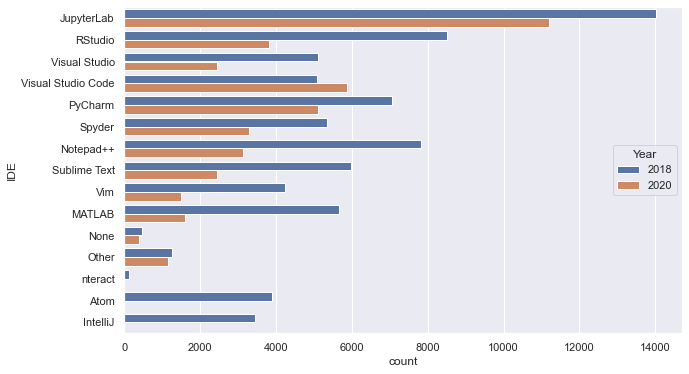

In [55]:
sns.set(rc={'figure.figsize': (10,6)})
sns.countplot(data = dfIDE2018y2020,y = "IDE",hue="Year",hue_order=[2018, 2020])

# IDE promedio

Text(0.5, 1.0, 'IDE promedio')

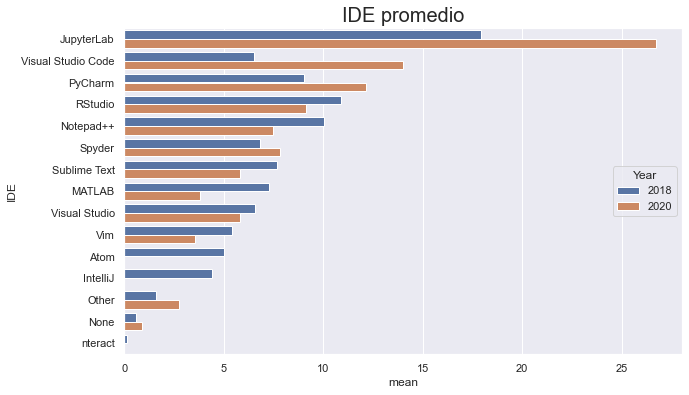

In [56]:
c= dfIDE2018y2020.groupby(['IDE','Year'], as_index=True).agg({'Year': ['count']})
c=c.reset_index()

data={'IDE':c.iloc[:,0],'Year':c.iloc[:,1],'Count':c.iloc[:,2]}

dfresumen=pd.DataFrame(data)
dfresumen['mean']=''

for f in range(len(dfresumen)):
    if dfresumen['Year'][f]==2018:
        dfresumen['mean'][f]=dfresumen['Count'][f]/len(dfIDE2018)*100
    else:
        dfresumen['mean'][f]=dfresumen['Count'][f]/len(dfIDE2020)*100

dfresumen.sort_values("mean",ascending=False,inplace=True)
dfresumen.reset_index(drop=True,inplace=True)
dfresumen

        
sns.set(rc={'figure.figsize': (10,6)})
ax = sns.barplot(y="IDE", x="mean", hue="Year", data=dfresumen)
ax.set_title('IDE promedio',fontsize=20)